In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split, HalvingRandomSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import os
import graphviz
from sklearn import tree
from sklearn.model_selection import GridSearchCV


In [2]:
# diretorio
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\mba esalq\arvores_redes_ensemble_models'
diretorio = diretorio.replace('\\','/')
os.chdir(diretorio)
os.listdir()

['aula1',
 'aula2',
 'aula3',
 'aula4',
 'aulas_principal.doc',
 'exercicios_arvore_decisao.py',
 'exercicio_arvore_regressao.py',
 'exercicio_random_forest.py',
 'script_arvore.py',
 'script_har.py',
 'titanic.xlsx',
 'voos.py']

# Significado das váriaveis
passengerid = ID do passageiro do navio (código primário);

survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu;

pclass = Tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;

name = Nome do passageiro;

sex = Gênero do passageiro, sendo masculino e feminino;

age = Idade do passageiro na data da ocorrência do naufrágio;

sibsp = Número de irmãos / cônjuges a bordo;

parch = Número de pais / filhos a bordo;

ticket = Código do ticket;

fare = Valor da passagem;

cabin = Código de identificação da Cabine;

embarked = Local ondem o passageiro embarcou no navio;

In [3]:
np.random.seed(123)

In [22]:
# dados
dados = pd.read_excel('titanic.xlsx', sheet_name='Sheet 1')
dados = pd.DataFrame(dados)
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [23]:
dummies_survived = pd.get_dummies(dados['Survived'], prefix='survived')
dummies_sex = pd.get_dummies(dados['Sex'], prefix='sex')
dummies_embarked = pd.get_dummies(dados['Embarked'], prefix='embarked')

dados = pd.concat([dados, dummies_survived,dummies_sex,dummies_embarked], axis=1)
dados.columns

# sugestao do plantao: transformar essas variaveis acima em dummies e uma coluna pra cada categoria de cada variavel 
# lembrar de apagar a coluna original: ex: vai ficar survivedN e outra coluna survivedS
# na formula da arvore nao precisa por as duas dummies, pq a informacao é a mesma



Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'survived_N', 'survived_Y', 'sex_female', 'sex_male',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')

In [43]:
# separação base treino e teste
var_x = dados[['Pclass','sex_male','Age','SibSp','Parch','Fare','embarked_Q']]
var_y = dados[['Survived']]

treino_x, teste_x, treino_y, teste_y = train_test_split(var_x, var_y, test_size=0.2, random_state=123)


In [69]:
dados['Survived'].unique()

array(['N', 'Y'], dtype=object)

In [45]:
# criacao da arvore
cp = 0.01
arvore = DecisionTreeClassifier (criterion ='gini',
                                 ccp_alpha = cp,
                                 max_depth = 5)

In [46]:
# fit 
arvore.fit(treino_x, treino_y)


DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5)

[Text(0.4090909090909091, 0.875, 'sex_male <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]\nclass = Pclass'),
 Text(0.18181818181818182, 0.625, 'Pclass <= 2.5\ngini = 0.38\nsamples = 251\nvalue = [64, 187]\nclass = sex_male'),
 Text(0.09090909090909091, 0.375, 'gini = 0.087\nsamples = 132\nvalue = [6, 126]\nclass = sex_male'),
 Text(0.2727272727272727, 0.375, 'gini = 0.5\nsamples = 119\nvalue = [58, 61]\nclass = sex_male'),
 Text(0.6363636363636364, 0.625, 'Age <= 13.0\ngini = 0.314\nsamples = 461\nvalue = [371, 90]\nclass = Pclass'),
 Text(0.45454545454545453, 0.375, 'SibSp <= 2.5\ngini = 0.473\nsamples = 26\nvalue = [10, 16]\nclass = sex_male'),
 Text(0.36363636363636365, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]\nclass = sex_male'),
 Text(0.5454545454545454, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Pclass'),
 Text(0.8181818181818182, 0.375, 'Pclass <= 1.5\ngini = 0.282\nsamples = 435\nvalue = [361, 74]\nclass = Pclass'),
 Text(0.7272727272727273, 0.

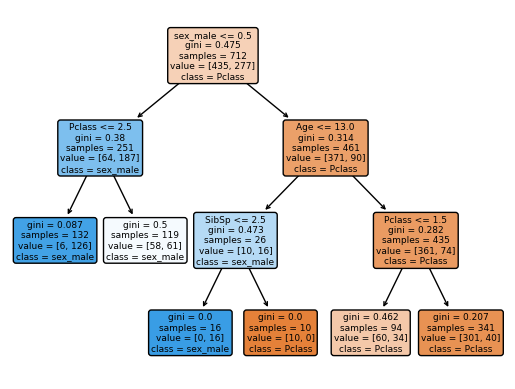

In [73]:
tree.plot_tree(arvore, 
               feature_names=['Pclass','sex_male','Age','SibSp','Parch','Fare','embarked_Q'],
               class_names= ['Pclass','sex_male','Age','SibSp','Parch','Fare','embarked_Q'], 
               filled = True,
               rounded = True)

In [48]:
# avaliacao base teste
predicts = arvore.predict(teste_x)
matriz_confusao = confusion_matrix(teste_y, predicts)
acuracia_teste = accuracy_score(teste_y, predicts)
acuracia_teste

0.8156424581005587

In [49]:
# tunning ccp
limite_inf = 0.01
limite_sup = 0.001
hiperparametros = {'ccp_alpha':(limite_inf,limite_sup),
                   'max_depth':(1,10)}

grid = HalvingRandomSearchCV(estimator = arvore,
                             param_distributions= hiperparametros,
                             scoring='accuracy',
                             factor=2,
                             n_jobs=1,
                             cv=5)
grid.fit(treino_x, treino_y)


c:\Users\Computadores Gamer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Computadores Gamer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=35. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


HalvingRandomSearchCV(estimator=DecisionTreeClassifier(ccp_alpha=0.01,
                                                       max_depth=5),
                      factor=2, n_jobs=1,
                      param_distributions={'ccp_alpha': (0.01, 0.001),
                                           'max_depth': (1, 10)},
                      scoring='accuracy')

In [51]:
# melhor ccp_alpha
ccp_otimo = grid.best_params_['ccp_alpha']
ccp_otimo

0.001

In [52]:
# melhor max_depth
max_otimo = grid.best_params_['max_depth']
max_otimo

10

In [53]:
arvore2 = DecisionTreeClassifier (criterion='gini',
                                 ccp_alpha = ccp_otimo,
                                 max_depth = max_otimo)

In [54]:
# fit arvore tunada
arvore2.fit(treino_x, treino_y)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10)

[Text(0.45797872340425533, 0.9545454545454546, 'sex_male <= 0.5\ngini = 0.475\nsamples = 712\nvalue = [435, 277]'),
 Text(0.25585106382978723, 0.8636363636363636, 'Pclass <= 2.5\ngini = 0.38\nsamples = 251\nvalue = [64, 187]'),
 Text(0.10212765957446808, 0.7727272727272727, 'Age <= 2.5\ngini = 0.087\nsamples = 132\nvalue = [6, 126]'),
 Text(0.06808510638297872, 0.6818181818181818, 'Fare <= 88.775\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05106382978723404, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0851063829787234, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.13617021276595745, 0.6818181818181818, 'Fare <= 26.125\ngini = 0.074\nsamples = 130\nvalue = [5, 125]'),
 Text(0.11914893617021277, 0.5909090909090909, 'Age <= 56.0\ngini = 0.198\nsamples = 45\nvalue = [5, 40]'),
 Text(0.10212765957446808, 0.5, 'Age <= 37.0\ngini = 0.165\nsamples = 44\nvalue = [4, 40]'),
 Text(0.06808510638297872, 0.4090909090909091, 'Age <= 26.5\n

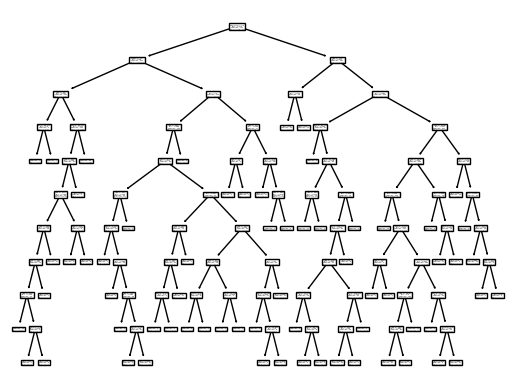

In [64]:
tree.plot_tree(arvore2, feature_names=['Pclass','sex_male','Age','SibSp','Parch','Fare','embarked_Q'])

In [60]:
# avaliacao base treino de arvore podada
predicts2_treino = arvore2.predict(treino_x)
matriz2_treino = confusion_matrix(treino_y, predicts2_treino)
acuracia2_treino = accuracy_score(treino_y, predicts2_treino)
acuracia2_treino

0.9129213483146067

In [61]:
# avaliacao base teste de arvore podada
predicts2 = arvore2.predict(teste_x)
matriz2 = confusion_matrix(teste_y, predicts2)
acuracia2 = accuracy_score(teste_y, predicts2) 
acuracia2

0.8100558659217877

In [57]:
matriz2

array([[100,  14],
       [ 20,  45]], dtype=int64)